In [16]:
import torch
from torchvision import transforms
from networks import percept, correlation

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Load an image from the TID 2008 dataset and 2 with varying levels of Additive Gaussian Noise and see if the distance measured using PerceptNet corresponds to distance in levels.


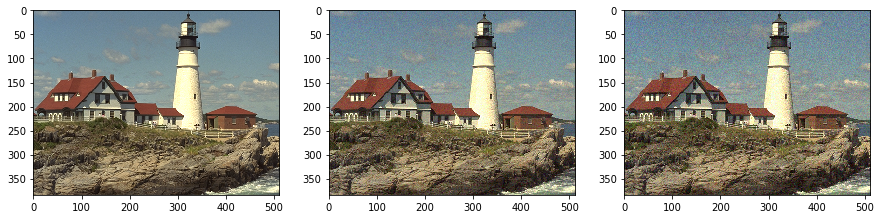

In [17]:
# TID reference Image
reference = Image.open('./example_images/reference/I21.BMP')
distorted_1 = Image.open('./example_images/distorted/I21_01_1.bmp')
distorted_2 = Image.open('./example_images/distorted/I21_01_2.bmp')
distorted_3 = Image.open('./example_images/distorted/I21_01_3.bmp')
distorted_4 = Image.open('./example_images/distorted/I21_01_4.bmp')

images = [reference, distorted_1, distorted_2, distorted_3, distorted_4]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for im, ax in zip(images, axes):
    ax.imshow(im)

In [18]:
net = percept(dims=3, normalisation='gdn')
net.load_state_dict(torch.load('./saved_networks/percept_colour_tid2008.pth', map_location='cpu'))

<All keys matched successfully>

Now, we will transform all the images into the perceptual domain, containing 128 representations of the image. We then display 6 random representations for the minimum and maximum distortion levels.

In [19]:
images_perceptual_space = []
for im in images:
    torch_im = transforms.ToTensor()(im)
    out = net(torch_im.unsqueeze(0))
    images_perceptual_space.append(out)

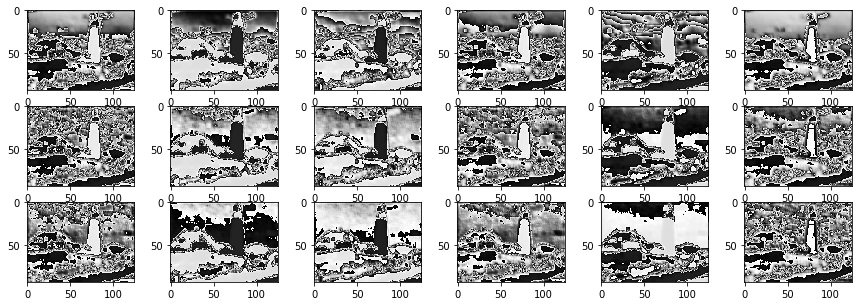

In [20]:
fig, axes = plt.subplots(3, 6, figsize=(15, 5))
indx = np.random.randint(0, 127, size=(6,))

for i, im in enumerate(images_perceptual_space[0:3]):
    for j, ind in enumerate(indx):
        pil_im = transforms.ToPILImage()(im.squeeze()[ind])
        axes[i, j].imshow(pil_im, cmap='gray')

Now we will take a root mean squared error between the reference and the two distorted images

In [21]:
correlation_function = correlation()
distances = [torch.norm(images_perceptual_space[0]-i, 2) for i in images_perceptual_space[1:]]

print('Distance between reference and distortion level 1: %.3f' %distances[0])
print('Distance between reference and distortion level 4: %.3f' %distances[-1])

Distance between reference and distortion level 1: 1824.477
Distance between reference and distortion level 4: 3589.333


Now we'll plot the distances against the level of distortion for Additive Gaussian noise

Text(0, 0.5, 'Distance in perceptual space')

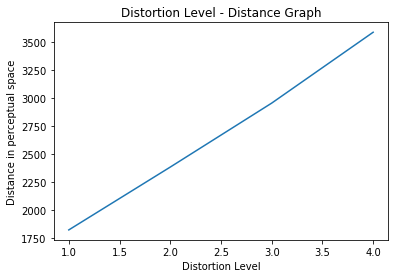

In [25]:
plt.plot(np.arange(1, 5), distances)
plt.title('Distortion Level - Distance Graph')
plt.xlabel('Distortion Level')
plt.ylabel('Distance in perceptual space')